In [1]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:18<00:00, 231MB/s]
100% 2.70G/2.70G [00:18<00:00, 157MB/s]


In [4]:
import zipfile
zip = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip')
zip.extractall('/content')
zip.close()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import os
from PIL import Image
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
BASE_DIR = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

test_dir = os.path.join(BASE_DIR, 'valid')
train_dir = os.path.join(BASE_DIR, 'train')

train_class_dir = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_class_dir = [os.path.join(test_dir, d) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

train_image_paths = []
test_image_paths = []

for class_dir in train_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)

for class_dir in test_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)


train_labels = [os.path.basename(class_dir) for class_dir in train_class_dir]
test_labels = [os.path.basename(class_dir) for class_dir in test_class_dir]

In [7]:
classes_train = os.listdir(train_dir)

classes_train


['Apple___Black_rot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Grape___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Blueberry___healthy',
 'Tomato___Leaf_Mold',
 'Corn_(maize)___healthy',
 'Tomato___Septoria_leaf_spot',
 'Cherry_(including_sour)___healthy',
 'Pepper,_bell___healthy',
 'Tomato___Bacterial_spot',
 'Grape___Black_rot',
 'Peach___Bacterial_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Pepper,_bell___Bacterial_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Potato___healthy',
 'Tomato___Target_Spot',
 'Tomato___Early_blight',
 'Corn_(maize)___Common_rust_',
 'Tomato___healthy',
 'Squash___Powdery_mildew',
 'Cherry_(including_sour)___Powdery_mildew',
 'Apple___Cedar_apple_rust',
 'Soybean___healthy',
 'Apple___healthy',
 'Potato___Early_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Lat

In [8]:
def show_random_smample(BASE_DIR, n_samples):
    classes = os.listdir(BASE_DIR)
    fig, ax = plt.subplots(1, n_samples, figsize=(5*n_samples, 6))
    fig.figure.figsize=(5*n_samples, 5)
    for i in range(n_samples):
        rand_class = classes[np.random.randint(0, len(classes), 1)[0]]
        rand_class_path = os.path.join(BASE_DIR, rand_class)
        samples = os.listdir(rand_class_path)
        rand_sample = np.random.randint(0, len(samples), 1)[0]
        img = cv2.imread(os.path.join(rand_class_path, samples[rand_sample]), cv2.COLOR_BGR2RGB)
        ax[i].imshow(img)
        ax[i].set_title(f"{rand_class},\n {img.shape}")
    fig.tight_layout()
    fig.suptitle("Random samples")
    fig.show()

In [9]:
show_random_smample(train_dir, n_samples=5)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
target_size = (100,100)

batch_size = 64


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [42]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [43]:
class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
num_classes = len(class_directories)
num_classes

38

In [46]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))


In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 12, 12, 128)     

In [49]:
num_epochs = 15
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

Epoch 1/15
1099/1099 [==============================] - 308s 277ms/step - loss: 2.9717 - accuracy: 0.1553 - val_loss: 1.8433 - val_accuracy: 0.4293
Epoch 2/15
1099/1099 [==============================] - 304s 276ms/step - loss: 1.5408 - accuracy: 0.5213 - val_loss: 0.9797 - val_accuracy: 0.6815
Epoch 3/15
1099/1099 [==============================] - 327s 298ms/step - loss: 1.0035 - accuracy: 0.6851 - val_loss: 0.7621 - val_accuracy: 0.7537
Epoch 4/15
1099/1099 [==============================] - 304s 277ms/step - loss: 0.7469 - accuracy: 0.7658 - val_loss: 0.5807 - val_accuracy: 0.8028
Epoch 5/15
1099/1099 [==============================] - 307s 280ms/step - loss: 0.5845 - accuracy: 0.8165 - val_loss: 0.4298 - val_accuracy: 0.8574
Epoch 6/15
1099/1099 [==============================] - 308s 280ms/step - loss: 0.4732 - accuracy: 0.8548 - val_loss: 0.3340 - val_accuracy: 0.8914
Epoch 7/15
1099/1099 [==============================] - 305s 277ms/step - loss: 0.4058 - accuracy: 0.8755 - val_

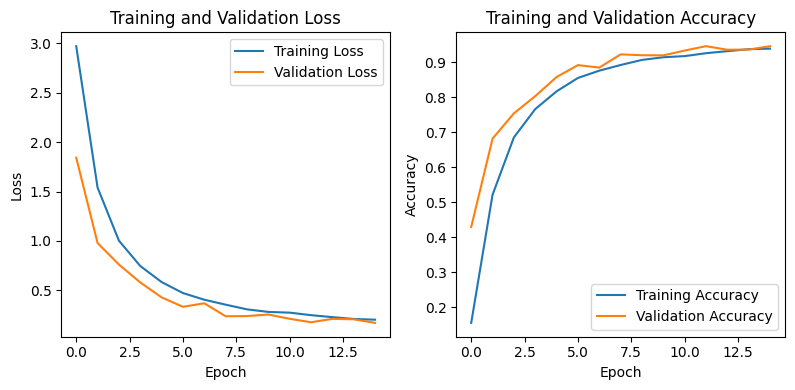

In [52]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()




plt.tight_layout()
plt.show()
